In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Herstellen der Ammoniak Lösung

In [2]:

Dichte_Lsg = 0.907  # bei 20 C, https://www.carlroth.com/medias/SDB-6774-AT-DE.pdf?context=bWFzdGVyfHNlY3VyaXR5RGF0YXNoZWV0c3wzMzQ4Mjd8YXBwbGljYXRpb24vcGRmfGFEa3dMMmhrTkM4NU1UZ3dOelF5TWpVME5qSXlMMU5FUWw4Mk56YzBYMEZVWDBSRkxuQmtaZ3w3ZWMyMDJjYTk1MDJkYzY3ZDQ3ZTJmY2Q3YjU0ZTNkMjMyNmI4ZDEzYWU5NDYxNjQzMzJlYTExNzIxNTA5MzA2
Molmasse_NH3 = 17.031  # g/mol

c0_NH3 = 0.25 * ((Dichte_Lsg * 1e3) / Molmasse_NH3)
Volumen_Lsg = 100 / c0_NH3  #mL
print("benötigtes Volumen 25%NH3 Lösung für 100mL: V(NH3)=" + str(round(Volumen_Lsg, 5)) + "mL")

benötigtes Volumen 25%NH3 Lösung für 100mL: V(NH3)=7.51092mL


In [3]:
# HCl + NH3 <=> Cl- + NH4+
# 10 mL Probe

V_HCl = 20.95e-3
c_HCl = .5  

n_NH3_Probe = c_HCl*V_HCl
c_NH3 = n_NH3_Probe/10e-3

# Annahme 1 Molar

V_Mass_Erwartet  = 1*10/c_HCl

print(f"""Erwarteteer Verbrauch: {V_Mass_Erwartet} mL
Errechnete Konzentration {c_NH3} mol/L""")

Erwarteteer Verbrauch: 20.0 mL
Errechnete Konzentration 1.0474999999999999 mol/L


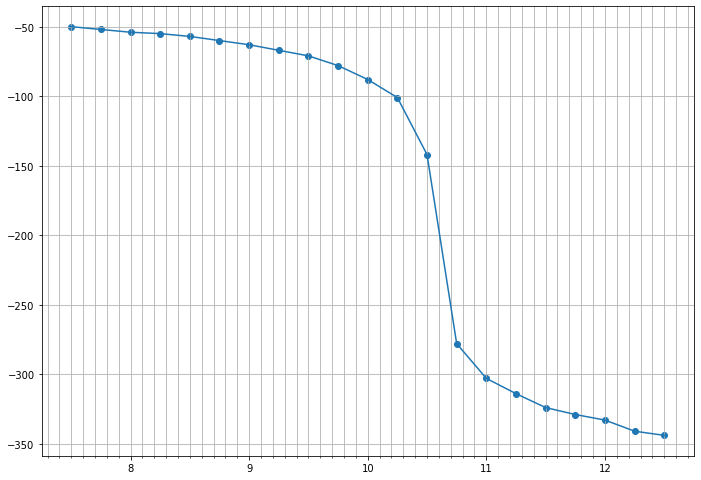

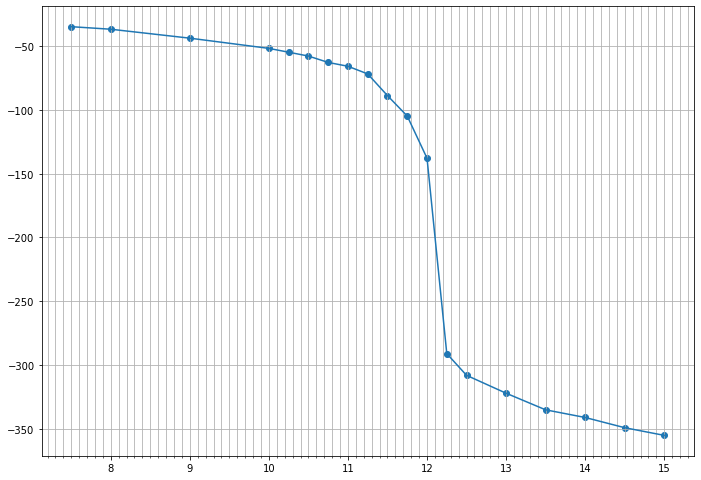

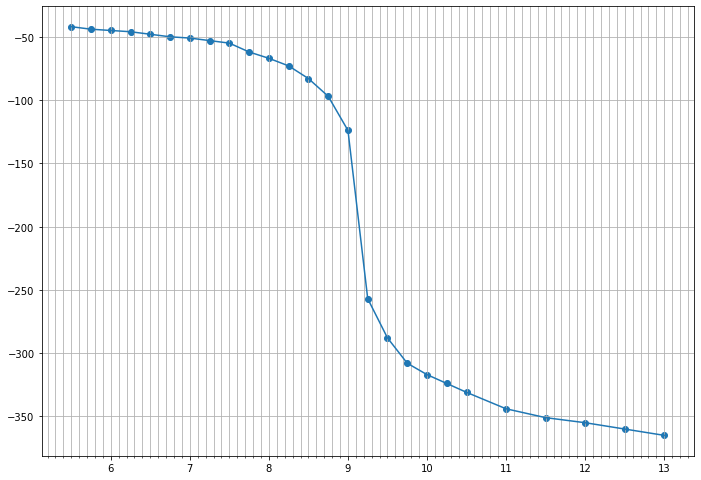

In [36]:
d1 = {
    7.5:-50,
    7.75:-52,
    8:-54,
    8.25:-55,
    8.5:-57,
    8.75:-60,
    9:-63,
    9.25:67,
    9.5:71,
    9.75:78,
    10:88,
    10.25:-101,
    10.5:-142,
    10.75:-278,
    11:-303,
    11.25:-314,
    11.5:-324,
    11.75:329,
    12:333,
    12.25:341,
    12.5:344,
}

d2 = {
    7.5:35,
    8:37,
    9:44,
    10:52,
    10.25:55,
    10.5:58,
    10.75:63,
    11:66,
    11.25:72,
    11.5:89,
    11.75:105,
    12:138,
    12.25:291,
    12.5:308,
    13:322,
    13.5:335,
    14:341,
    14.5:349,
    15:355,
}

d3 = {
    5.5:42,
    5.75:44,
    6:45,
    6.25:46,
    6.5:48,
    6.75:50,
    7:51,
    7.25:53,
    7.5:55,
    7.75:62,
    8:67,
    8.25:73,
    8.5:83,
    8.75:97,
    9:124,
    9.25:257,
    9.5:288,
    9.75:308,
    10:317,
    10.25:324,
    10.5:331,
    11:344,
    11.5:351,
    12:355,
    12.5:360,
    13:365,
} 


fig, ax = plt.subplots(figsize=(11.69,8.27))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.scatter(list(d1.keys()), [-abs(x) for x in d1.values()])
ax.plot(list(d1.keys()), [-abs(x) for x in d1.values()])
ax.grid(which='both')
fig.savefig("d1.pdf")
fig, ax = plt.subplots(figsize=(11.69,8.27))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.scatter(list(d2.keys()), [-abs(x) for x in d2.values()])
ax.plot(list(d2.keys()), [-abs(x) for x in d2.values()])
ax.grid(which='both')
fig.savefig("d2.pdf")

fig, ax = plt.subplots(figsize=(11.69,8.27))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.scatter(list(d3.keys()), [-abs(x) for x in d3.values()])
ax.plot(list(d3.keys()), [-abs(x) for x in d3.values()])
ax.grid(which='both')
fig.savefig("d3.pdf")


In [22]:
#!!!Konzentration der Ammoniak-Lsg?!!!:


c0_NH3 = 1.0475  # mol/L

KL_AgCl = 1.76e-10  # mol^2/L^2
c_KI = 5e-2  # mol/L
c0_Cl = 0.1  # mol/L
c0_Ag = 0.1  # mol/L
V0_NH3 = 20e-3  # L
V_Lsg = 60e-3  # L


def Auswertung(V0_Ag, V0_Cl, V_KI):  # Eingabe : mL
    # Umrechnung in SI Einheiten
    V0_Ag = V0_Ag * 1e-3
    V0_Cl = V0_Cl * 1e-3
    V_KI = V_KI * 1e-3

    # (Hier sollte beobachtet werden ob das Volumen nach dem Filtern sinkt
    # und ob eine individuelle Volumenbestimmung besser wäre
    n_Komp = (60 / 25) * c_KI * V_KI  # mol
    c_Komp = n_Komp / V_Lsg  # mol/L

    c_Cl = (c0_Cl * V0_Cl - ((c0_Ag * V0_Ag) - n_Komp)) / V_Lsg
    c_NH3 = (c0_NH3 * V0_NH3 - 2 * n_Komp) / V_Lsg

    K = c_Cl * c_Komp / ((c_NH3 ** 2) * KL_AgCl)

    return [K, c_Komp, c_Cl, c_NH3]


V1 = Auswertung(20, 20, 10.6)
print(
    f"""Lauf 1:
    Komplexbildungskonstante KL = {np.format_float_scientific(V1[0])}
    Konzentration des Diamminsilbers {V1[1]}
    Konzentration des Chlorids {V1[2]}
    Konzentration des Ammoniaks {V1[3]}""")

Lauf 1:
    Komplexbildungskonstante KL = 2.713580560705301e+07
    Konzentration des Diamminsilbers 0.0212
    Konzentration des Chlorids 0.0212
    Konzentration des Ammoniaks 0.3067666666666667


In [25]:
# Erneuter Print für geordnetere Auswertung
print(
    f"""Lauf 1:
    Komplexbildungskonstante KL = {np.format_float_scientific(V1[0])}
    Konzentration des Diamminsilbers {V1[1]}
    Konzentration des Chlorids {V1[2]}
    Konzentration des Ammoniaks {V1[3]}""")
V2 = Auswertung(
    20,  # V0_Ag
    15,  # V0_Cl
    11.90,  # V_KI
)
print(
    f"""Lauf 2:
    Komplexbildungskonstante KL = {np.format_float_scientific(V2[0])}
    Konzentration des Diamminsilbers {V2[1]}
    Konzentration des Chlorids {V2[2]}
    Konzentration des Ammoniaks {V2[3]}""")
V3 = Auswertung(
    15,  # V0_Ag
    20,  # V0_Cl
    9.14,  # V_KI
)
print(
    f"""Lauf 3:
    Komplexbildungskonstante KL = {np.format_float_scientific(V3[0])}
    Konzentration des Diamminsilbers {V3[1]}
    Konzentration des Chlorids {V3[2]}
    Konzentration des Ammoniaks {V3[3]}""")

print(f"""
Auswertung:
    Mittelwert KL = {np.format_float_scientific(np.mean([V1[0], V2[0], V3[0]]))}""")

Lauf 1:
    Komplexbildungskonstante KL = 2.713580560705301e+07
    Konzentration des Diamminsilbers 0.0212
    Konzentration des Chlorids 0.0212
    Konzentration des Ammoniaks 0.3067666666666667
Lauf 2:
    Komplexbildungskonstante KL = 2.2998226343152307e+07
    Konzentration des Diamminsilbers 0.0238
    Konzentration des Chlorids 0.015466666666666667
    Konzentration des Ammoniaks 0.3015666666666667
Lauf 3:
    Komplexbildungskonstante KL = 2.8285660602601197e+07
    Konzentration des Diamminsilbers 0.01828
    Konzentration des Chlorids 0.026613333333333333
    Konzentration des Ammoniaks 0.31260666666666675

Auswertung:
    Mittelwert KL = 2.613989751760217e+07
